In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score , classification_report,mean_absolute_error# Regression
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,confusion_matrix # Classification
import seaborn as sns   
import matplotlib.pyplot as plt 

       
       

In [96]:
# load Excel file
f_path = 'C:/Users/PERIYASAMY/OneDrive/Documents/jananiphonepe/Copper_Set.xlsx'
# view the Excel file
df = pd.read_excel(f_path)


In [ ]:
df.head()

In [ ]:
df["item type"].unique()
df["country"].unique()
df["status"].unique()
df["application"].unique()

In [5]:
df.shape

(181673, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df.duplicated().sum()
     

np.int64(0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [10]:
print(len(df['item_date'].unique()))
print(len(df['customer'].unique()))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique()))
print(len(df['delivery date'].unique()))

253
1170
16564
33
29


In [11]:
#data cleaning  null values Data type conversion :

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


In [12]:
# drop'id' and 'material_ref' columns  they are not needed for analysis
df = df.drop(['id'], axis = 1)
df = df.drop(['material_ref'], axis = 1)
     

In [13]:
# Fill missing values in 'item_date' and 'delivery date'  
df['item_date'] = df['item_date'].ffill()
df['delivery date'] = df['delivery date'].ffill()


In [14]:
#Data preprocessing:
# Convert relevant columns to appropriate numeric data types
# missing numeric values with the mean delete rows with missing categorical values in 'customer', 'country', and 'status' columns
# missing values in numeric columns with the mean

df = df[df['quantity tons'] != 'e']
df['quantity tons'] = df['quantity tons'].astype(float)
df.fillna(value = df['quantity tons'].mean(), inplace= True)
df.dropna(subset=['customer'], inplace = True)
df.dropna(subset=['country'], inplace = True)
df.dropna(subset=['status'], inplace = True)
df.fillna(value = df['thickness'].mean(), inplace= True)
     

In [15]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
#Exploratory Data Analysis (EDA) for quantity tons 
df['quantity tons'].unique()

array([   54.15113862,   768.0248392 ,   386.12794891, ...,
           4.23559357, -2000.        ,   406.68653838])

In [17]:
def plot(df, column):#one def function to all 
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    # Violin Plot
    plt.subplot(1, 3, 2)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')

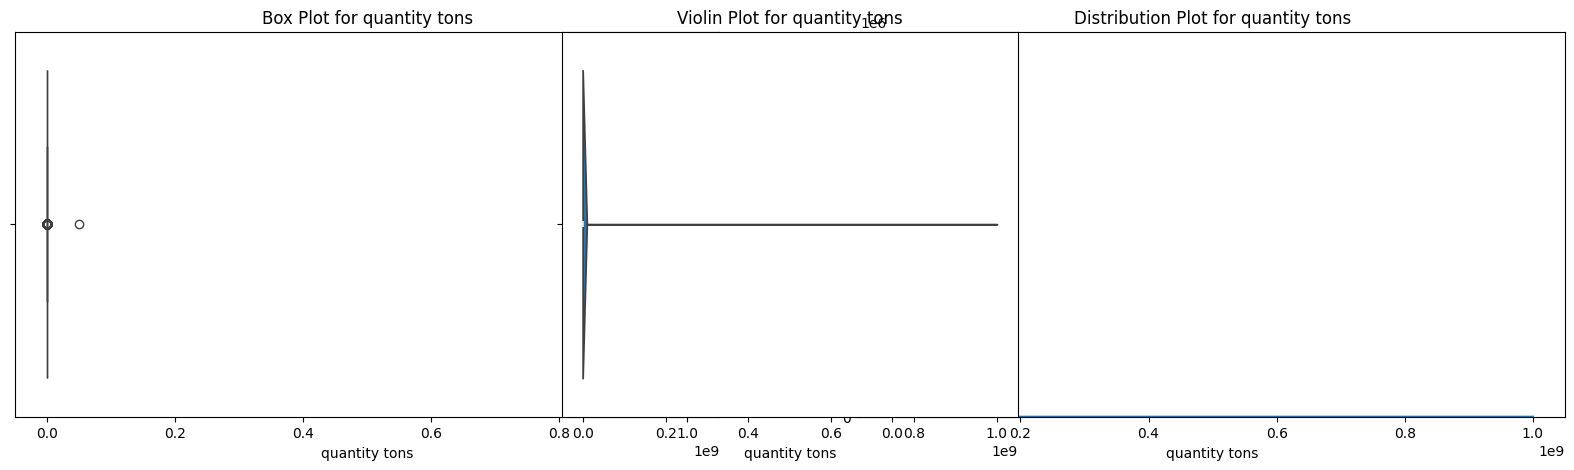

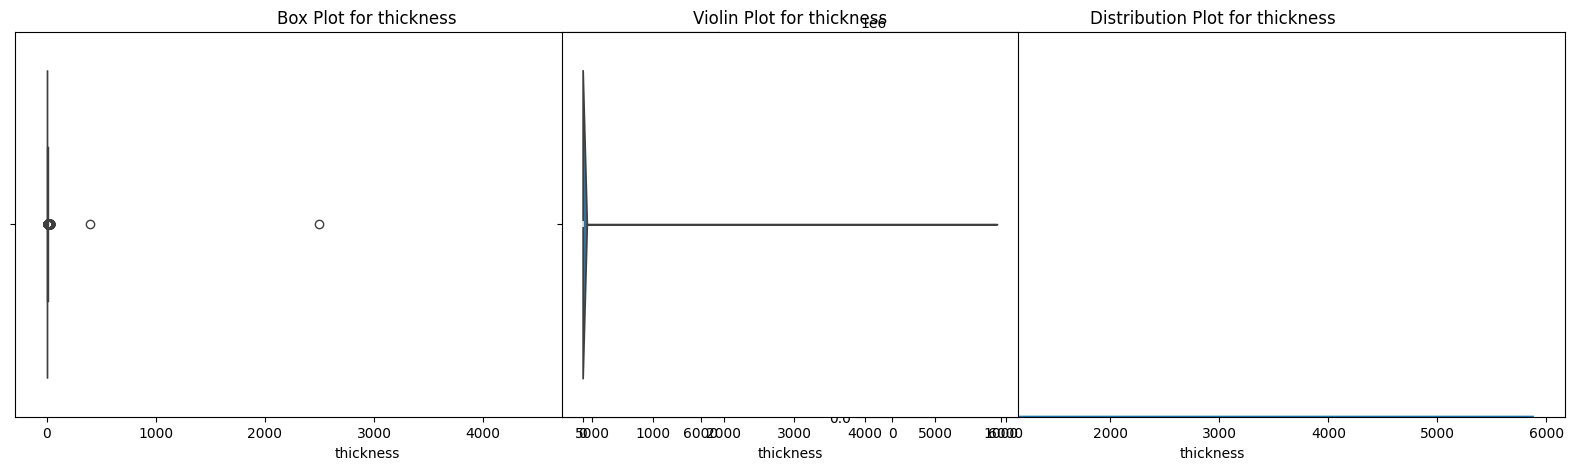

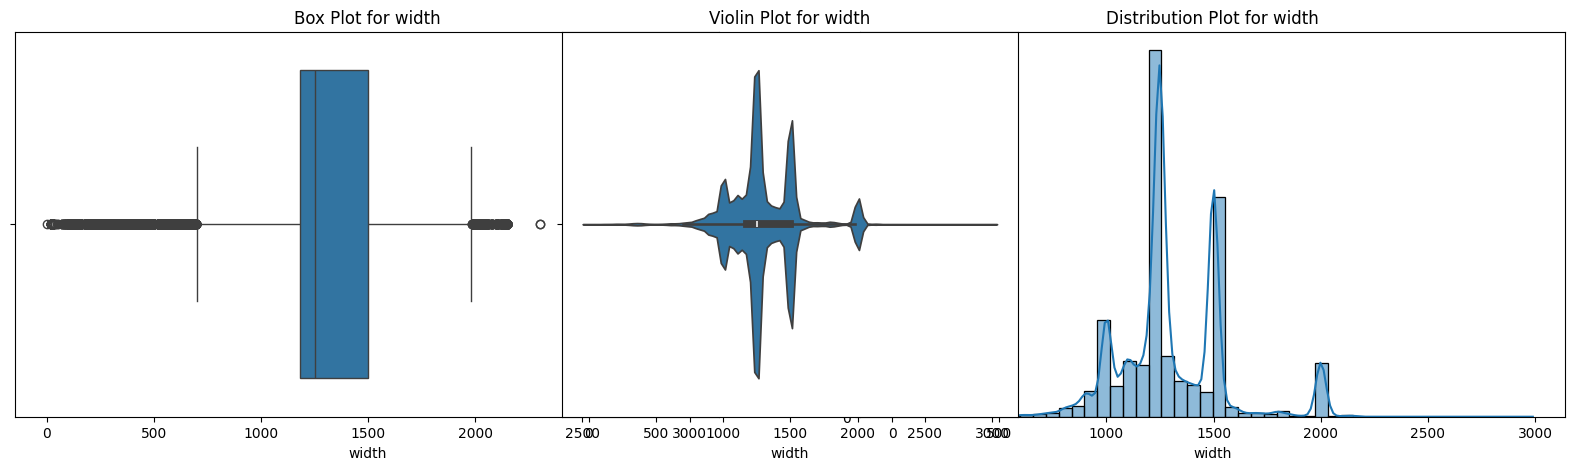

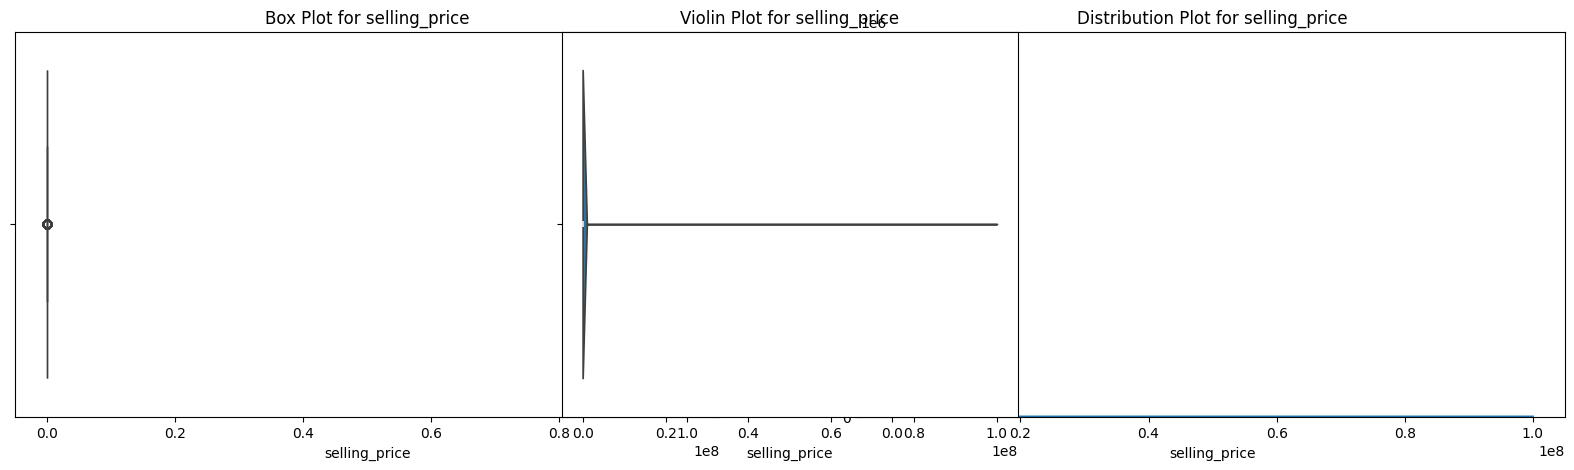

In [18]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [35]:
df["quantity tons"]

0           54.151139
1          768.024839
2          386.127949
3          202.411065
4          785.526262
             ...     
181668     102.482422
181669     208.086469
181670       4.235594
181671   -2000.000000
181672     406.686538
Name: quantity tons, Length: 181673, dtype: float64

In [19]:
df1 = df.copy()
df1['quantity tons'] = np.log(df1['quantity tons'])#log beneficial for certain statistical analyses 
df1['thickness'] = np.log(df1['thickness'])
df1['selling_price'] = np.log(df1['selling_price'])
df1

c:\Users\PERIYASAMY\OneDrive\Documents\jananiphonepe\clean_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\PERIYASAMY\OneDrive\Documents\jananiphonepe\clean_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105
181671,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,-0.162519,1250.0,164141591,2020-07-01,6.398595


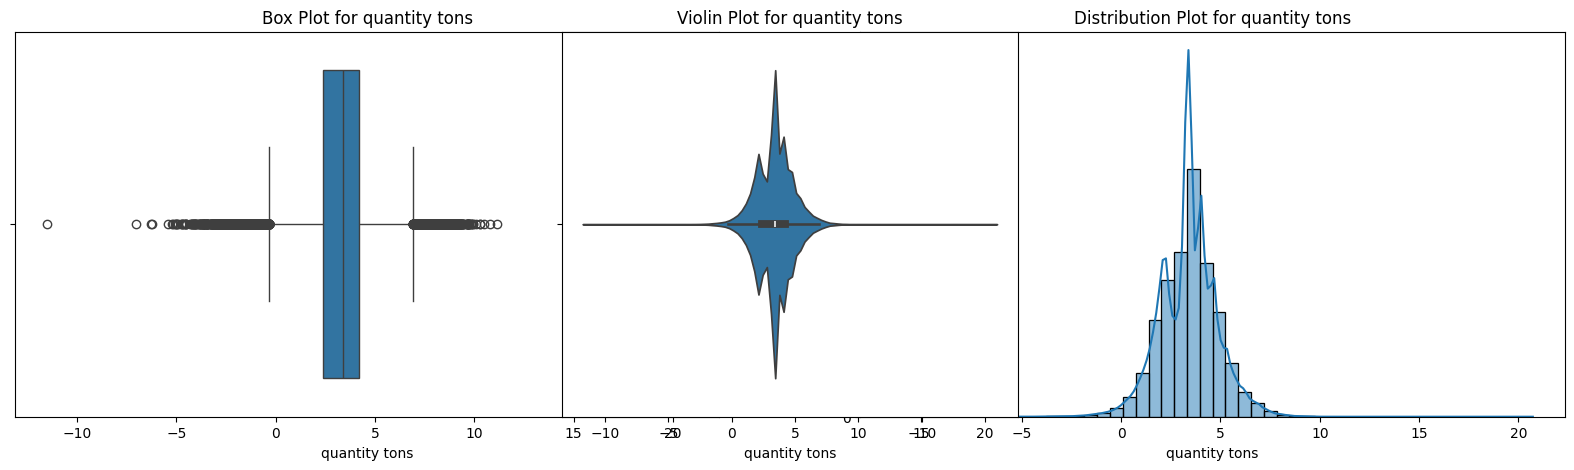

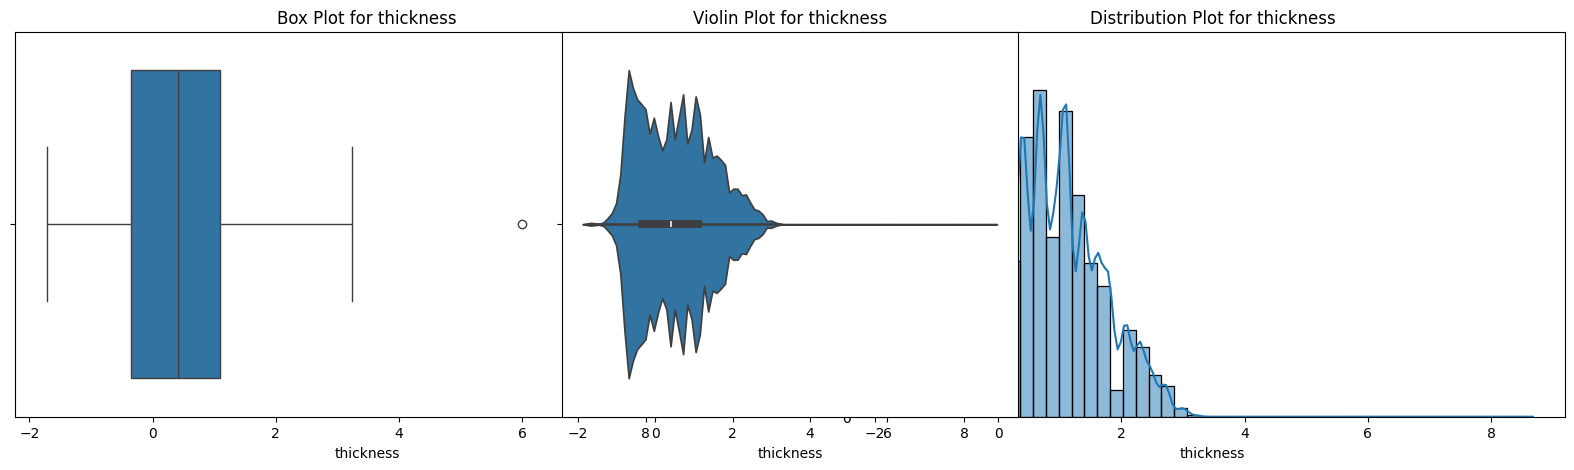

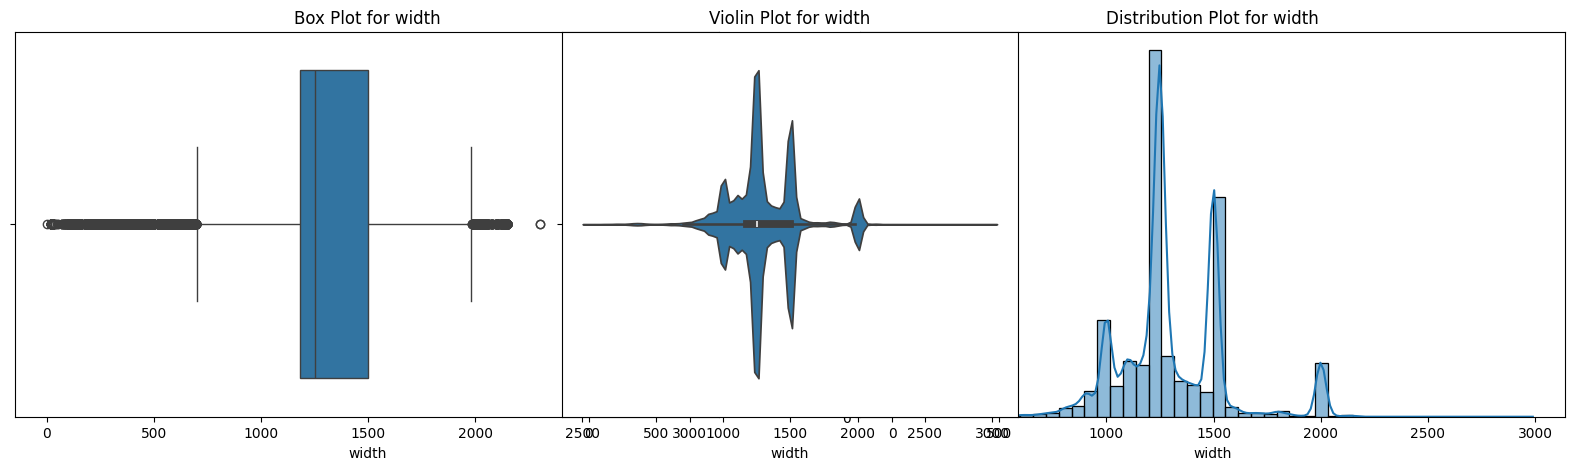

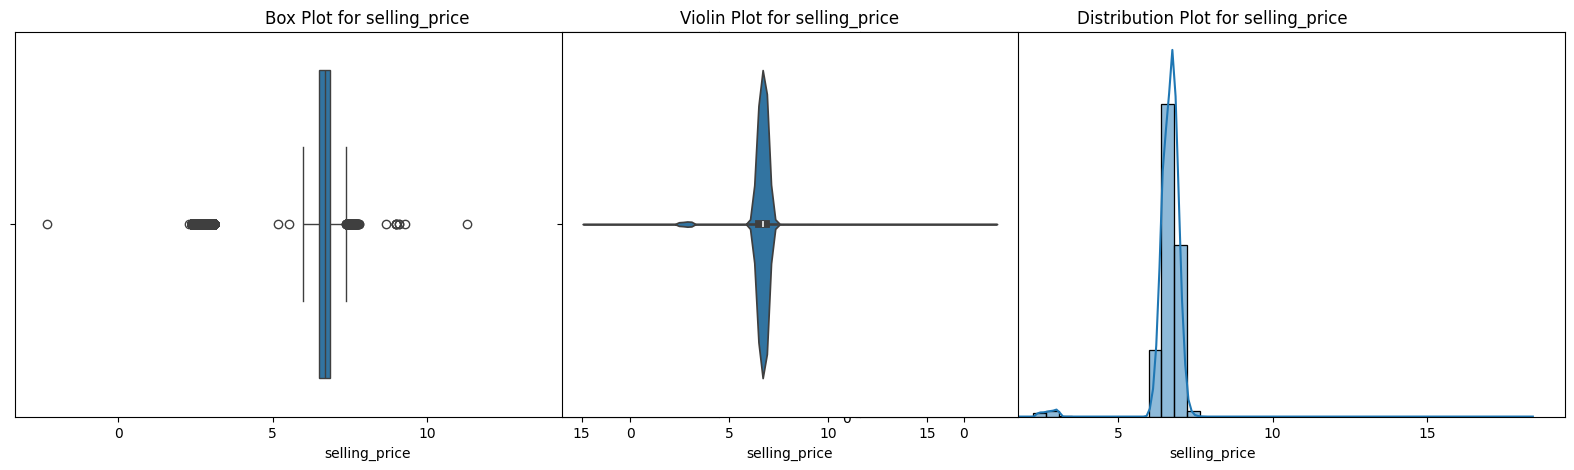

In [20]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

In [21]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe
# (Ex: lower threshold = 5 and upper threshold = 20)

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
  
outlier(df1, 'quantity tons')
outlier(df1, 'thickness')
outlier(df1, 'selling_price')
outlier(df1, 'width')
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,1980.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105
181671,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,-0.162519,1250.0,164141591,2020-07-01,6.398595


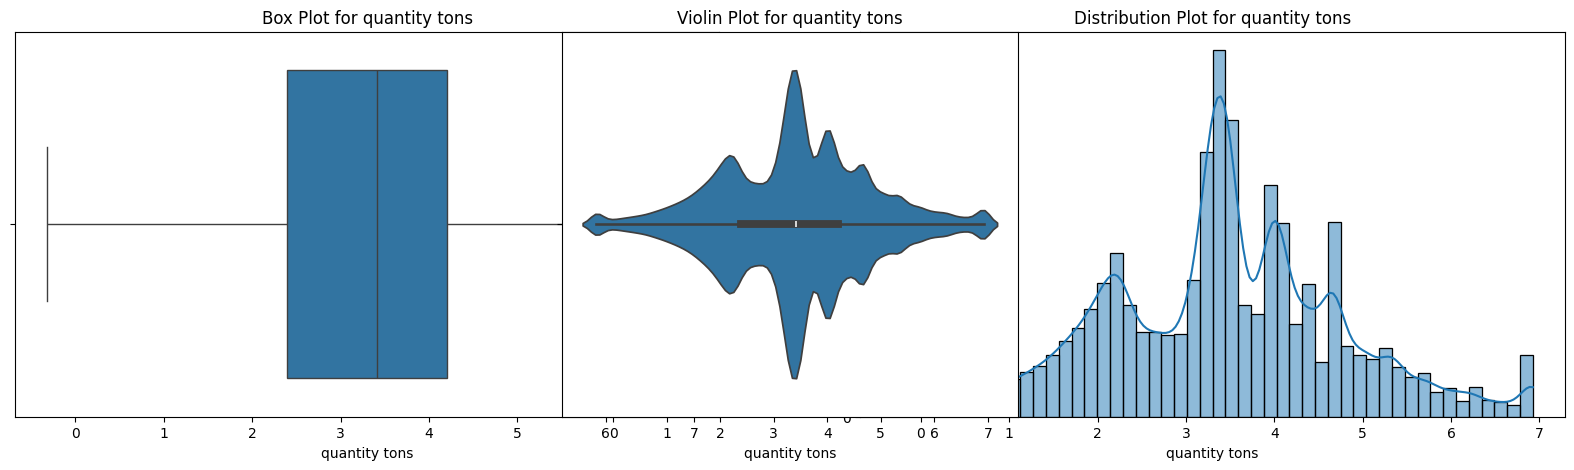

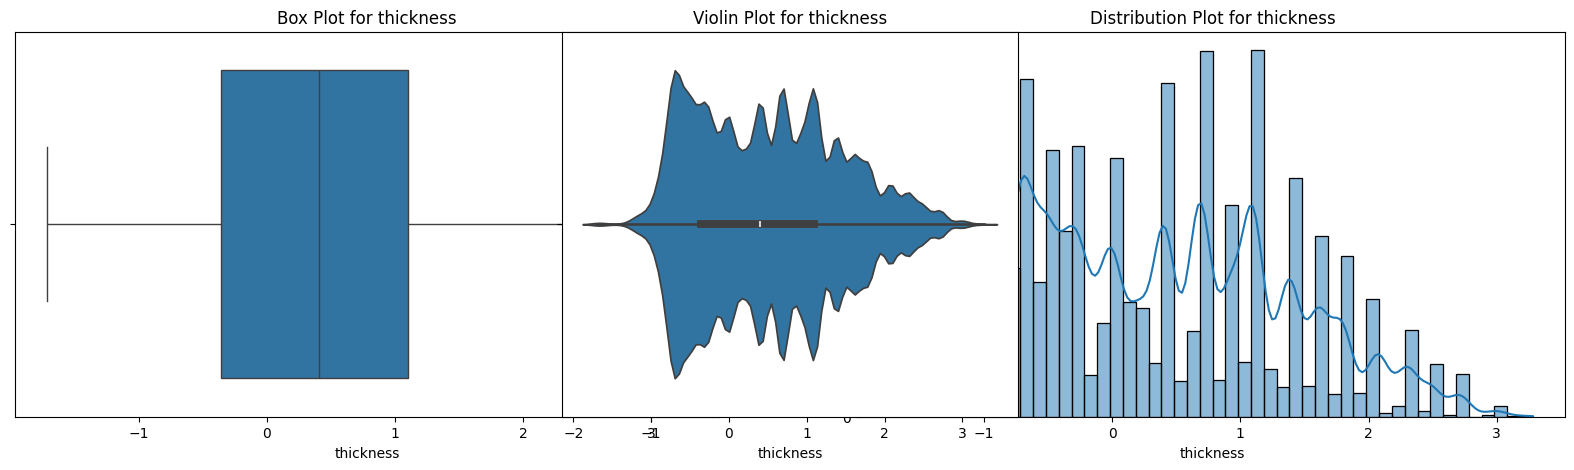

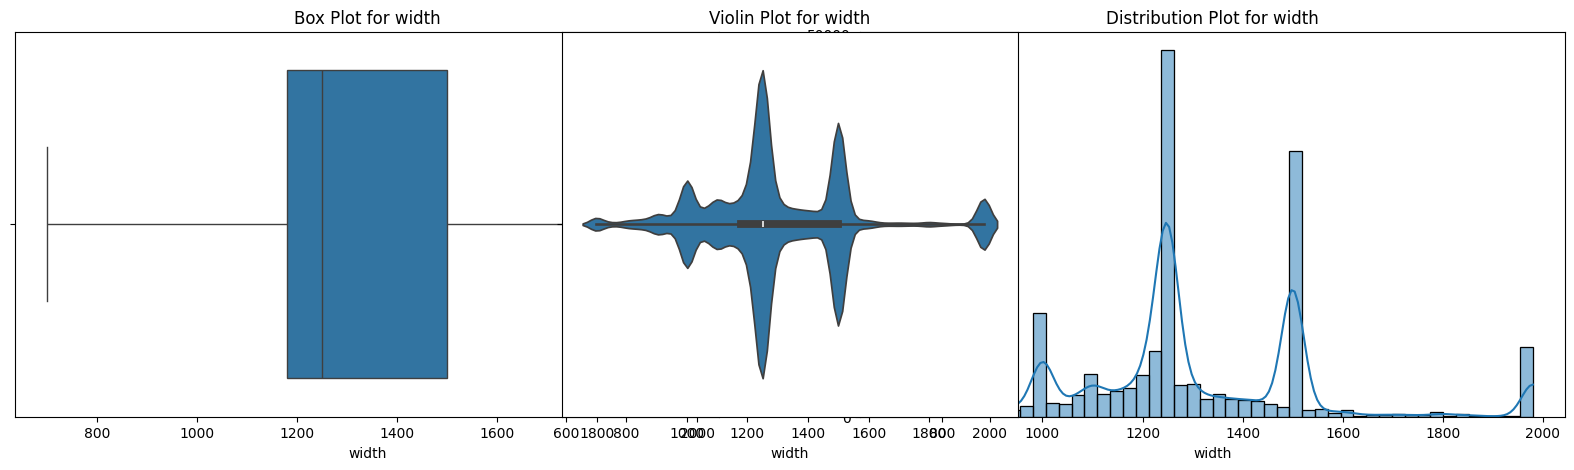

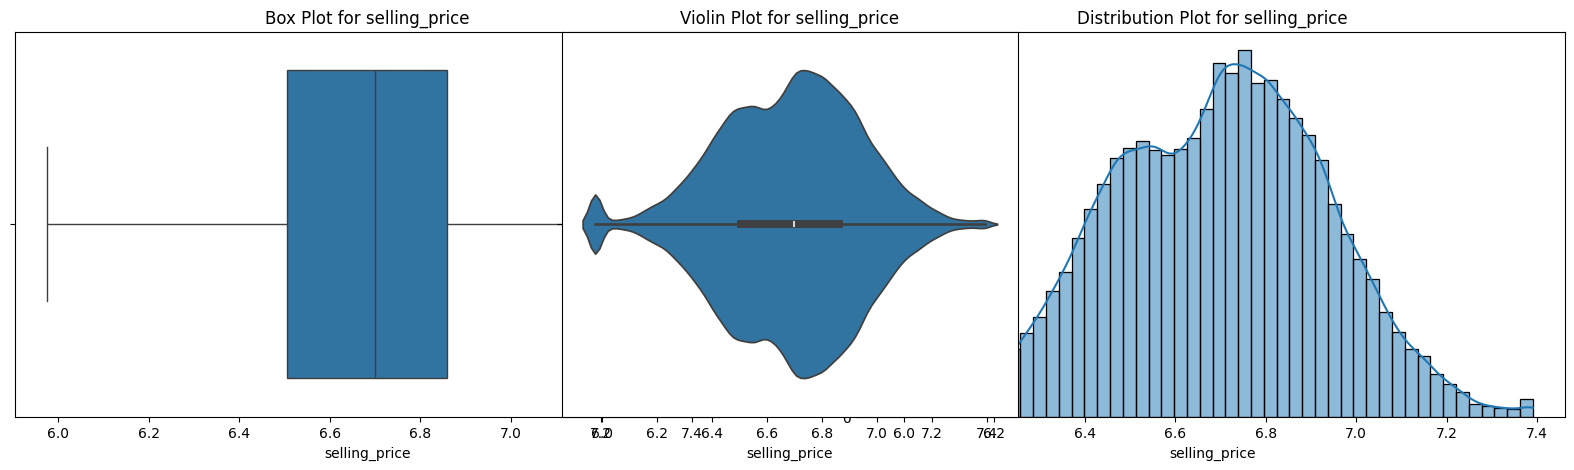

In [22]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

<Axes: >

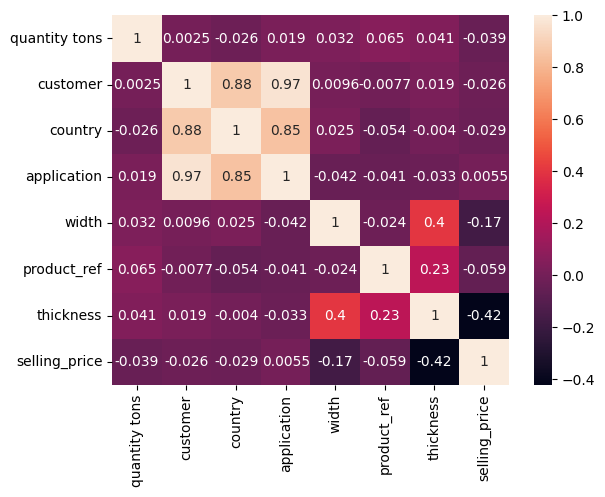

In [23]:
#Data Visualization
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value)otherwisee drop the columns.

col = ['quantity tons','customer','country','application','width','product_ref','thickness','selling_price']
df_heatmap = df1[col].corr()
sns.heatmap(df_heatmap, annot=True)
     

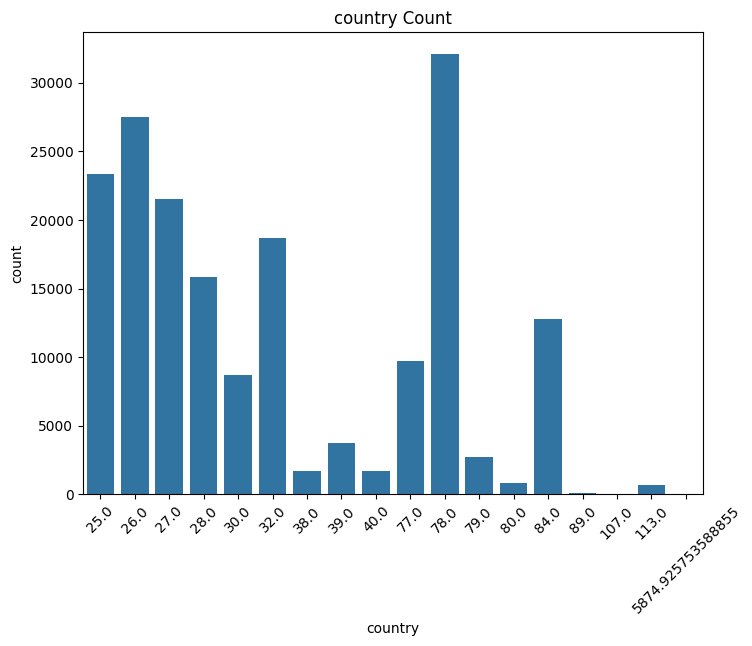

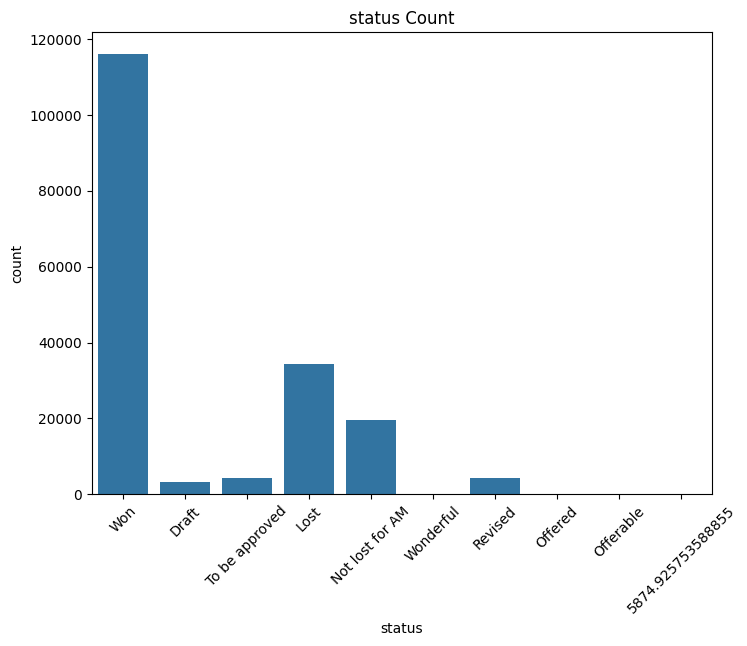

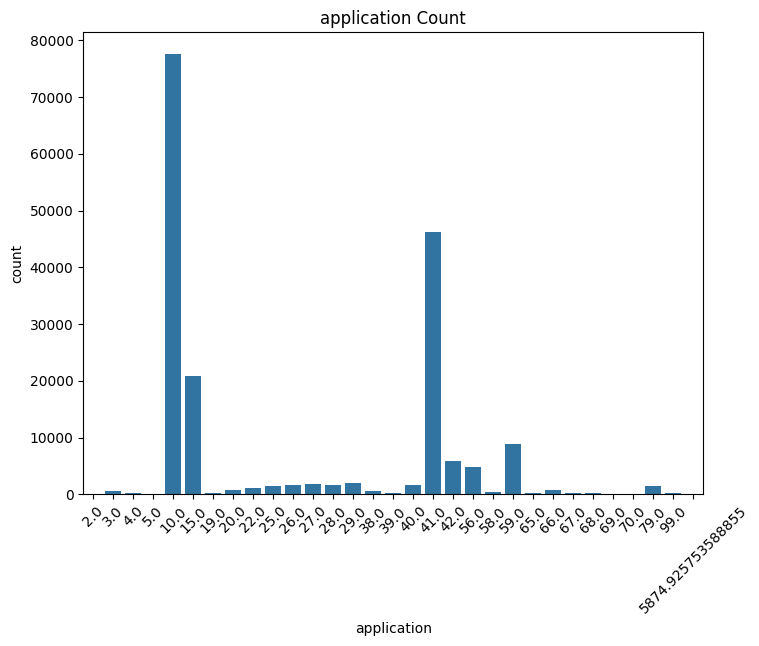

In [24]:
categorical_variables = ['country', 'status', 'application']
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'{var} Count')
    plt.xticks(rotation=45)
    plt.show()

Regression -nlp

In [26]:
# Set the option to handle future downcasting behavior silently
pd.set_option('future.no_silent_downcasting', True)

# Replace string to numerical codes
df1["status"] = df1["status"].replace({'Won': 1, 'Draft': 7, 'To be approved': 6, 'Lost': 0, 'Not lost for AM': 2, 'Wonderful': 8, 'Revised': 5, 'Offered': 4, 'Offerable': 3})
df1["item type"] = df1["item type"].replace({'W': 5, 'WI': 6, 'S': 3, 'Others': 1, 'PL': 2, 'IPL': 0, 'SLAWR': 4})
     


In [27]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1.0,5,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1.0,5,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1.0,6,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1.0,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1.0,5,10.0,1.386294,1980.0,640665,2021-03-01,6.357842


In [28]:
df1.status.unique()

array([1.00000000e+00, 7.00000000e+00, 6.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 8.00000000e+00, 5.00000000e+00, 4.00000000e+00,
       3.00000000e+00, 5.87492575e+03])

In [29]:
df1['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [30]:
df1.status.isnull().sum()

np.int64(0)

In [31]:
df1.isnull().sum()#tones  not null value remove 

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    5
dtype: int64

In [32]:
df1.dropna(inplace = True)

In [33]:
df1.to_csv('CopperRegression.csv',index = False)

In [34]:
f=open('C:/Users/PERIYASAMY/OneDrive/Documents/jananiphonepe/CopperRegression.csv')
dfr = pd.read_csv(f)

In [35]:
dfr

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1.0,5,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1.0,5,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1.0,6,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1.0,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1.0,5,10.0,1.386294,1980.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181659,2020-07-02,4.670802,30200854.0,25.0,1.0,5,41.0,-0.040822,1240.0,164141591,2020-07-01,6.400257
181660,2020-07-02,4.629691,30200854.0,25.0,1.0,5,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181661,2020-07-02,5.337954,30200854.0,25.0,1.0,5,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181662,2020-07-02,1.443523,30200854.0,25.0,1.0,5,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105


In [37]:
df1['width'].min(),df1['width'].max()

(np.float64(700.0), np.float64(1980.0))

In [38]:
import pickle
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score


In [39]:
#model
x1=df1.drop(["selling_price", 'item_date', 'delivery date'],axis=1)
y1=df1["selling_price"]

In [40]:

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)
     

In [76]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

In [80]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor

In [78]:

class Reg_models:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def decisiontree(self):
        model = DecisionTreeRegressor().fit(self.x_train, self.y_train)
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        r2_train = r2_score(self.y_train, y_pred_train)
        r2_test = r2_score(self.y_test, y_pred_test)
        accuracy_metrics = {'R2_train': r2_train, 'R2_test': r2_test}
        print("DecisionTree Regressor accuracy score: ", r2_train, r2_test)
        return accuracy_metrics

    def RandomForestRegressor(self):
        model = RandomForestRegressor().fit(self.x_train, self.y_train)
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        r2_train = r2_score(self.y_train, y_pred_train)
        r2_test = r2_score(self.y_test, y_pred_test)
        accuracy_metrics = {'R2_train': r2_train, 'R2_test': r2_test}
        print("RandomForest Regressor accuracy score: ", r2_train, r2_test)
        return accuracy_metrics

    def GradientBoosting(self):
        model = GradientBoostingRegressor().fit(self.x_train, self.y_train)
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        r2_train = r2_score(self.y_train, y_pred_train)
        r2_test = r2_score(self.y_test, y_pred_test)
        accuracy_metrics = {'R2_train': r2_train, 'R2_test': r2_test}
        print("GradientBoosting Regressor accuracy score: ", r2_train, r2_test)
        return accuracy_metrics

    def AdaBoost(self):
        model = AdaBoostRegressor().fit(self.x_train, self.y_train)
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        r2_train = r2_score(self.y_train, y_pred_train)
        r2_test = r2_score(self.y_test, y_pred_test)
        accuracy_metrics = {'R2_train': r2_train, 'R2_test': r2_test}
        print("AdaBoost Regressor accuracy score: ", r2_train, r2_test)
        return accuracy_metrics

    def ExtraTreesRegressor(self):
        model = ExtraTreesRegressor().fit(self.x_train, self.y_train)
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        r2_train = r2_score(self.y_train, y_pred_train)
        r2_test = r2_score(self.y_test, y_pred_test)
        accuracy_metrics = {'R2_train': r2_train, 'R2_test': r2_test}
        print("Extra Trees Regressor accuracy score: ", r2_train, r2_test)
        return accuracy_metrics

In [79]:
model = Reg_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}


DecisionTree Regressor accuracy score:  1.0 0.5370996443453004
RandomForest Regressor accuracy score:  0.9633872539172396 0.7416059454139945
GradientBoosting Regressor accuracy score:  0.31142204346325897 0.31151845017628854
AdaBoost Regressor accuracy score:  0.13373626390970272 0.13826896763115504
Extra Trees Regressor accuracy score:  1.0 0.7397582962618308


In [81]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9177219575899328, 0.7335433893108769)

In [82]:
model1 = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r
     

{'R2': 0.7337526409854048,
 'Mean Absolute Error': np.float64(0.10508970468709838),
 'Mean Squared Error': np.float64(0.04746426492197683),
 'Root Mean Squared Error': np.float64(0.21786294986063331)}

In [83]:
with open('regression_model1.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [84]:
from joblib import dump, load
dump(model1, 'regresssion_model.joblib')

['regresssion_model.joblib']

In [85]:
x1.head(5)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,1.0,5,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,1.0,5,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,1.0,6,28.0,-0.967584,952.0,628377
3,5.310301,30349574.0,32.0,1.0,3,59.0,0.832909,1317.0,1668701718
4,6.666354,30211560.0,28.0,1.0,5,10.0,1.386294,1980.0,640665


In [86]:
y_pred = model1.predict(np.array([[15.447678,30202938.0,	25.0,	1.0,	5,	41.0,	0.693147,	1210.0,	1668701718]]))
np.exp(y_pred[0])

c:\Users\PERIYASAMY\OneDrive\Documents\jananiphonepe\clean_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(2.2479079866764717)

In [49]:
# classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

In [50]:
df2 = df1.copy()

In [51]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1.0,5,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1.0,5,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1.0,6,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1.0,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1.0,5,10.0,1.386294,1980.0,640665,2021-03-01,6.357842


In [52]:
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df2 = df2[(df2.status == 1) | (df2.status == 0)]

In [53]:
df2.shape

(150441, 12)

In [54]:
df2.status.value_counts()

status
1.0    116003
0.0     34438
Name: count, dtype: int64

In [55]:
df2['item type'].value_counts()

item type
5    91950
3    52464
2     5032
6      504
1      463
0       27
4        1
Name: count, dtype: int64

In [56]:
df.to_csv('CopperModelingClassification.csv',index = False)

In [57]:
#Model Building
f=open('C:/Users/PERIYASAMY/OneDrive/Documents/jananiphonepe/CopperModelingClassification.csv')
dfc = pd.read_csv(f)

In [58]:
dfc

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [59]:
x2=df2.drop(["status", 'item_date', 'delivery date'],axis=1)
y2=df2["status"]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.1)

In [61]:
class Classification_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

  def ExtraTreesClassifier(self):
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Extra Trees Classifier accuracy score: ",accuracy)
    return accuracy


In [62]:
model = Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestClassifier(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesClassifier': model.ExtraTreesClassifier()}

max_score_classifier = max(accuracy_scores, key=accuracy_scores.get)
max_accuracy_score = accuracy_scores[max_score_classifier]

print(f"\nMaximum accuracy score: {max_accuracy_score:.4f} achieved by {max_score_classifier} classifier.\n")
     

Decision Tree Classifier accuracy score:  0.9195746095048188
Random Forest Classifier accuracy score:  0.9404453306746428
Gradient Boosting Classifier accuracy score:  0.8335659687603855


c:\Users\PERIYASAMY\OneDrive\Documents\jananiphonepe\clean_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier accuracy score:  0.8142904619474909
Extra Trees Classifier accuracy score:  0.9336656696576936

Maximum accuracy score: 0.9404 achieved by RandomForest classifier.



In [63]:
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x2,y2,test_size=0.2,random_state=42)

model = RandomForestClassifier().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test


(0.9999916910396172, 0.9378178071720562)

In [64]:
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))
     

[[ 5724  1262]
 [  748 22355]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      6986
         1.0       0.95      0.97      0.96     23103

    accuracy                           0.93     30089
   macro avg       0.92      0.89      0.90     30089
weighted avg       0.93      0.93      0.93     30089



In [65]:
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [66]:
from joblib import dump, load
dump(model, 'class_model.joblib')

['class_model.joblib']

In [67]:
x2.head(5)

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,5,10.0,0.693147,1500.0,1670798778,6.749931
1,6.643822,30202938.0,25.0,5,41.0,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30153963.0,30.0,6,28.0,-0.967584,952.0,628377,6.468211
3,5.310301,30349574.0,32.0,3,59.0,0.832909,1317.0,1668701718,6.643790
4,6.666354,30211560.0,28.0,5,10.0,1.386294,1980.0,640665,6.357842


In [70]:
with open(r'C:\Users\PERIYASAMY\OneDrive\Documents\jananiphonepe\classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[54.151139,30156308.0,28.0,5,10.0,0.693147,1500.0,1670798778,	85.0]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')
     

Won


c:\Users\PERIYASAMY\OneDrive\Documents\jananiphonepe\clean_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Dataset Description:
The dataset pertains to industrial copper production and includes various attributes related to copper mining, refining, and utilization.
It comprises both numerical and categorical variables, such as production volume, copper grade, mining location, refining method, etc.
Key variables include copper production volume (tons), ore grade, refining techniques, geographical location of mines, etc.
Data Cleaning:
Identified and addressed missing values, ensuring data integrity and completeness.
Conducted data type conversion and normalization to ensure consistency across columns.
Removed redundant or irrelevant features that did not contribute to the modeling objectives.
Exploratory Data Analysis (EDA):
Analyzed the distribution of copper production volumes to understand its variability and trends over time.
Explored relationships between key variables such as ore grade, refining method, and production volume.
Investigated geographical patterns of copper mining and production.
Feature Engineering:
Converted categorical variables into numerical representations using encoding techniques like one-hot encoding or label encoding.
created new features if necessary, such as calculating the average ore grade per mining location or refining technique.
Modeling:
Developed predictive models to forecast industrial copper production volumes.
Considered regression techniques suitable for continuous target variables, such as Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, etc.
Evaluated model performance using metrics like mean squared error (MSE), R-squared, and mean absolute error (MAE).
Model Selection and Tuning:
Selected the best-performing model based on cross-validated performance metrics.
Fine-tuned hyperparameters of the selected model to optimize predictive accuracy and generalization.
Predictions:
Utilized the trained model to make predictions on future or unseen data.
Demonstrated the process of saving and loading the trained model for practical deployment or further analysis.
The analysis aimed to provide insights into industrial copper production dynamics and develop accurate models for forecasting future production volumes, facilitating informed decision-making in the copper industry.